In [9]:
import torch
from torch.autograd import Variable
import numpy as np
import time
import matplotlib.pyplot as plt

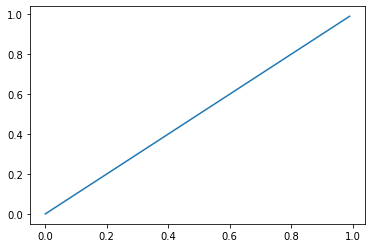

In [10]:
# Visualize Data
with torch.no_grad():
    VISUAL_X = X.detach().cpu().numpy()
    VISUAL_Y = Y.detach().cpu().numpy()
    plt.plot(VISUAL_X, VISUAL_X)

In [2]:
def Get_Data():
    X_TRAIN = np.arange(0, 1, 0.01).reshape(-1, 1)
    Y_TRAIN = (X_TRAIN * 0.3 + 1).reshape(-1, 1)
    
    # Pytorch Variable
    X = Variable(torch.from_numpy(X_TRAIN).type(torch.FloatTensor))
    Y = Variable(torch.from_numpy(Y_TRAIN).type(torch.FloatTensor))
    X.to(DEVICE)
    Y.to(DEVICE)
    
    return X, Y

In [3]:
def Get_Parameter():
    W = Variable(torch.rand(1), requires_grad = True)
    B = Variable(torch.rand(1), requires_grad = True)
    W.to(DEVICE)
    B.to(DEVICE)
    
    return W, B

In [4]:
def Neural_Network():
    PREDICTION = torch.matmul(X, W) + B
    
    return PREDICTION

In [5]:
def Loss_Function(Y, PREDICTION):
    LOSS = (PREDICTION - Y).pow(2).mean()
    
    # Reset the gradient in W and B
    for PARAMETER in [W, B]:
        if not PARAMETER.grad is None:
            PARAMETER.grad.data.zero_()
            
    # Calculate Gradient
    LOSS.backward()
    
    return LOSS

In [6]:
def Optimizer(Learning_Rate):
    W.data -= Learning_Rate * W.grad
    B.data -= Learning_Rate * B.grad
    
    return W, B

In [7]:
if __name__ == "__main__":
    DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    
    X, Y = Get_Data()
    W, B = Get_Parameter()
    
    for EPOCH in range(300):
        PREDICTION = Neural_Network()
        LOSS = Loss_Function(Y, PREDICTION)
        W, B = Optimizer(0.025)
        
    print('Loss =', LOSS.data, 'Weights =', W.data, 'Biases =', B.data)

Loss = tensor(0.0160) Weights = tensor([0.3161]) Biases = tensor([0.9810])
